## Double Pendulum Using Langrangians (plots)

This notebook has the smaller timescales to have cleaner theta(t) plots.
Removed the animation code from here since it won't run smoothly with these timescales

Start importing packages

In [1]:
#import our packages
import numpy as np
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp
from IPython.display import Image

## Have a fun display picture for reference

Picture from Wikipedia about the double pendulum to show the general setup.

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/7/78/Double-Pendulum.svg')

Using the generalized coordinates and Lagrangian

## Define our Double Pendulum Class

In [3]:
class DoublePen():
    """
    Our class for our double pendulum that uses Langrange instead of Hamilton equations
    
    Parameters:
    L1: length of first pendulum
    L2: length of second pendulum
    m1: mass of first pendulum
    m2: mass of second pendulum
    g: gravity
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g
        
    def dy_dt(self, t, y):
        """
        Returns the right side of our differential equation which gives us
        d/dt of theta1, theta2, theta1_dot, and theta2_dot
        """
        theta1, z1, theta2, z2 = y
        
        c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
        denom = (self.m1 + self.m2 * s**2)
        
        theta1_dot = z1
        
        z1_dot = (self.m1 *self.g * np.sin(theta2) * c \
                  - self.m2 * s * (self.L1 * z1**2 * c + self.L2 * z2**2) \
                  - (self.m1 + self.m2) * self.g * np.sin(theta1)) / self.L1 / denom
        
        theta2_dot = z2
        
        z2_dot = ((self.m1 + self.m2) * (self.L1 * z1**2 * s - self.g * np.sin(theta2) + self.g * np.sin(theta1) * c) \
                  + self.m2 *self.L2 * z2**2 * s * c) / self.L2 / denom
        
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0,
                  abserr=1.0e-10, relerr = 1.0e-10):
        """
        Solves our ODE with initial conditions 
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]),
                            y, t_eval=t_pts,
                            atol = abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y
        
        return theta1, theta1_dot, theta2, theta2_dot
    
    def solve_E(y):
        """
        Solves for the total energy
        """
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*np.cos(th1) - m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 + 0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 + 2*L1*L2*th1d*th2d*np.cos(th1-th2))
        
        return T + V
    

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, color=None,
                linestyle=None, semilogy=False, loglog=False, ax=None):
    """
    Our normal plotting function from previous notebooks and hint videos
    """
    if ax is None:
        ax = plt.gca()
    
    if (semilogy):
        line, = ax.semilogy(x, y, label=label, color=color, linestyle=linestyle)
    
    elif (loglog):
        line, = ax.loglog(x, y, label=label, color=color, linestyle=linestyle)
    
    else:
        line, = ax.plot(x, y, label=label, color=color, linestyle=linestyle)
        
    if label is not None:
        ax.legend()
    if title is not None:
        ax.set_title(title)
    if axis_labels is not None:
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        
    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()
    return start_index, stop_index

In [6]:
#Labels for plot 
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

#Plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

L1 = 1.
L2 = 1.
m1 = 1.
m2 = 1.
g = 1.

#Initiate the DoublePendulum class 
dp1 = DoublePen(L1=L1, L2=L2, m1=m1, m2=m2, g=g)

### Checking it works with example from hints

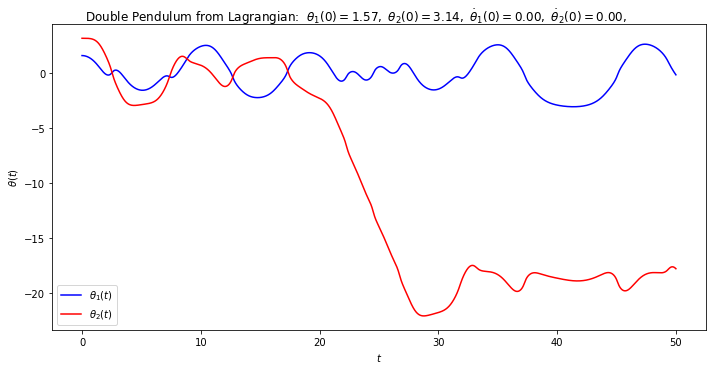

In [7]:
#Using the same initial conditions in the hint video to get a general start
#To show that our class and functions work and then change initial conditions
#Later to make our own pendulums and plots

theta1_0 = np.pi/2.
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian: ' + \
                 rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                 rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                 rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                 rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' 

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'blue',
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'red',
            label = r'$\theta_2(t)$',
            ax = ax_a)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

## Make our own plots

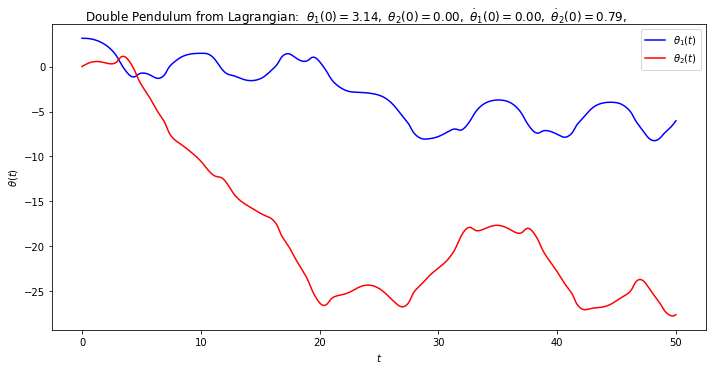

In [8]:
theta1_0 = np.pi
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = np.pi/4.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian: ' + \
                 rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                 rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                 rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                 rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' 

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'blue',
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'red',
            label = r'$\theta_2(t)$',
            ax = ax_a)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

## Delta theta(t) plot

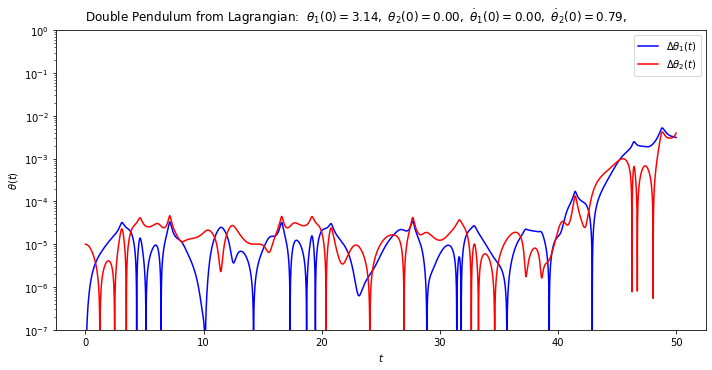

In [9]:
theta1_0 = np.pi
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = np.pi/4.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian: ' + \
                 rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                 rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                 rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                 rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' 

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop]-theta1b[start : stop]),
            axis_labels = theta_vs_time_labels,
            color = 'blue', semilogy=True,
            label = r'$\Delta\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop]-theta2b[start : stop]),
            axis_labels = theta_vs_time_labels,
            color = 'red', semilogy=True,
            label = r'$\Delta\theta_2(t)$',
            ax = ax_a)

ax_a.set_ylim(1.e-7, 1.)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')

## Another normal theta(t) plot

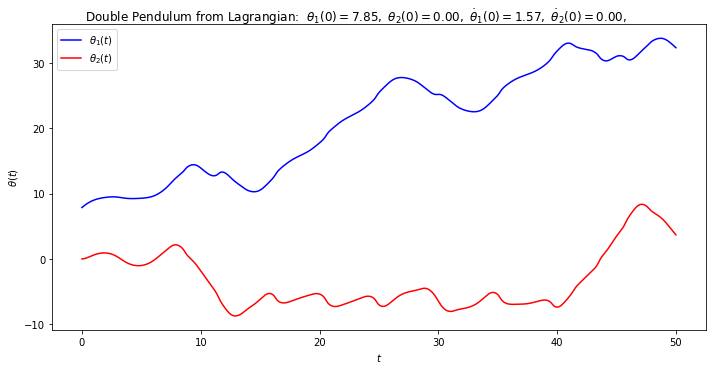

In [10]:
#Plotting time
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)

theta1_0 =  5 * np.pi/2.
theta1_dot_0 = np.pi/2.
theta2_0 = 0.
theta2_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot = \
    dp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)

#Start plotting
fig = plt.figure(figsize=(10,5))
overall_title = 'Double Pendulum from Lagrangian: ' + \
                 rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                 rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                 rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                 rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' 

fig.suptitle(overall_title, va='baseline')

ax_a = fig.add_subplot(1,1,1)

start, stop = start_stop_indices(t_pts, t_start, t_end)
plot_y_vs_x(t_pts[start : stop], theta1[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'blue',
            label = r'$\theta_1(t)$',
            ax = ax_a)
plot_y_vs_x(t_pts[start : stop], theta2[start : stop],
            axis_labels = theta_vs_time_labels,
            color = 'red',
            label = r'$\theta_2(t)$',
            ax = ax_a)

fig.tight_layout()
#fig.savefig('double_pendulum_lagrange_1.png', bbox_inches='tight')